---
title: "Lab 3: Patient Wellness Segmentation Using Clustering and PCA"
author: Sandy Young
date: April 20, 2025
subtitle: Northwood University MGT 665
---

## Abstract

This study explores the segmentation of patients based on wellness indicators to support targeted healthcare interventions. Population health management has increasingly utilized clustering and principal component analysis to identify distinct segment among patients based on their healthcare needs and utilization patterns. This segmentation aims to tailor healthcare delivery efficiently by recognizing the heterogeneity present in patient populations. Using a simulated dataset containing health metrics such as daily exercise, diet, sleep, stress, and BMI, clustering techniques and Principal Component Analysis (PCA) were employed to uncover distinct wellness profiles. K-Means and Hierarchical Clustering were applied before and after PCA, and the models were evaluated using silhouette scores and within-cluster sum of squares (WCSS). Results indicate that dimensionality reduction using PCA retains interpretability while improving clustering visualization. Recommendations are provided for tailoring wellness programs based on the identified patient segments.

## Introduction

Healthcare organizations increasingly prioritize preventive care and wellness to enhance patient outcomes and reduce costs. This paper investigates how unsupervised learning techniques can be applied to segment patients based on wellness indicators.  One pivotal approach involves the use of linked healthcare data to conduct cluster analyses, revealing unique segments of patients within a general practice population. For instance, Nnoaham and Cann demonstrated that by applying such methods, distinct segments can be identified based on healthcare utilization parameters, allowing for targeted healthcare planning and resource allocation (Nnoaham & Cann, 2020). This aligns with findings from Low et al., who assessed longitudinal healthcare utilization, revealing significant variations in patient segments concerning emergency department visits, which are critical for understanding broader healthcare trajectories and needs (Low et al., 2018). The integration of secondary care data in segmentation, as shown in the work of Pioch et al., affirms the importance of leveraging broad healthcare claims data to distinguish diverse population segments characterized by unique demographic and morbidity profiles (Pioch et al., 2023).

In addition to clustering techniques, PCA serves as a powerful analytical method to reduce dimensionality in health data, enhancing the interpretability of clustered data patterns. Hou et al. illustrated this in pediatric patients with spastic cerebral palsy, where clustering techniques supported by PCA enabled the identification of patient subgroups likely to respond best to specific treatments (Hou et al., 2023). Similarly, Viraraghavan et al. highlighted automated clustering methods that generate meaningful clusters in complex patient data, facilitating insight into treatment responses and care prioritization (Viraraghavan et al., 2023).

The methodologies for clustering vary widely, as evidenced by several studies that have employed different algorithms to effectively ascertain patient similarities and differences. For example, methods like K-means and hierarchical clustering have shown efficacy in recognizing significant clusters in patient populations, as reflected in the research by Ferro et al. (Ferro et al., 2021). This flexibility in clustering is especially beneficial in recognizing multimorbidity patterns, where patients may experience overlapping health issues (Verhoeff et al., 2023). The objective is to identify distinct behavioral and physiological profiles that could benefit from customized interventions.

## Methodology

### Data Description 

The dataset includes 200 records the following wellness indicators for each patient:

Daily Exercise Time (minutes)

Healthy Meals per Day

Sleep Duration (hours)

Stress Level (score: 1-10)

Body Mass Index (BMI)

### Exploratory Data Analysis (EDA)

Descriptive statistics and visualizations (e.g., histograms, pairplots, and correlation heatmaps) were used to explore relationships between features. For example, patients who exercised more and had healthier diets generally exhibited lower BMI and stress levels. A pairplot illustrated these relationships, and a correlation heatmap showed moderate to strong correlations between stress level, sleep, and BMI.

In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from pandas.plotting import table
import numpy as np

# Load dataset
df = pd.read_csv("C:/Users/smyou/Downloads/simulated_health_wellness_data (1).csv")


In [12]:
# Descriptive statistics and basic data information
print(df.describe())
print(df.info())

       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.898547  
<class 'pandas.core.frame.D

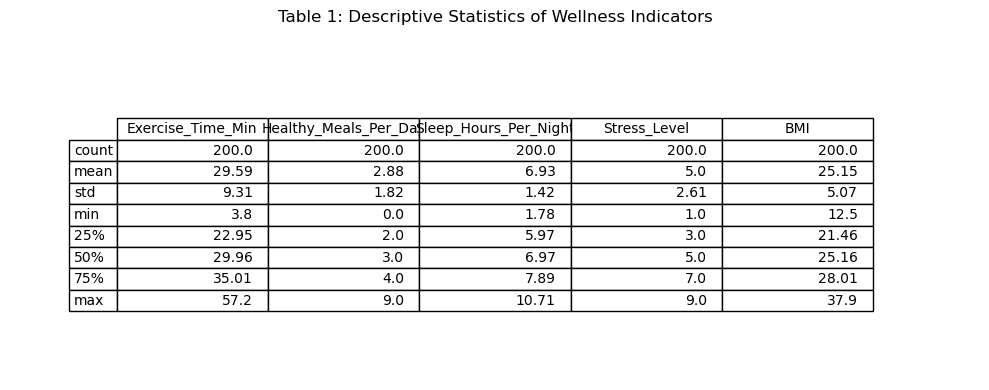

In [13]:
# Create a matplotlib table
desc_stats = df.describe().round(2)

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
tbl = table(ax, desc_stats, loc='center', colWidths=[0.13]*len(desc_stats.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title("Table 1: Descriptive Statistics of Wellness Indicators", fontsize=12, pad=20)
plt.tight_layout()

c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\smyou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

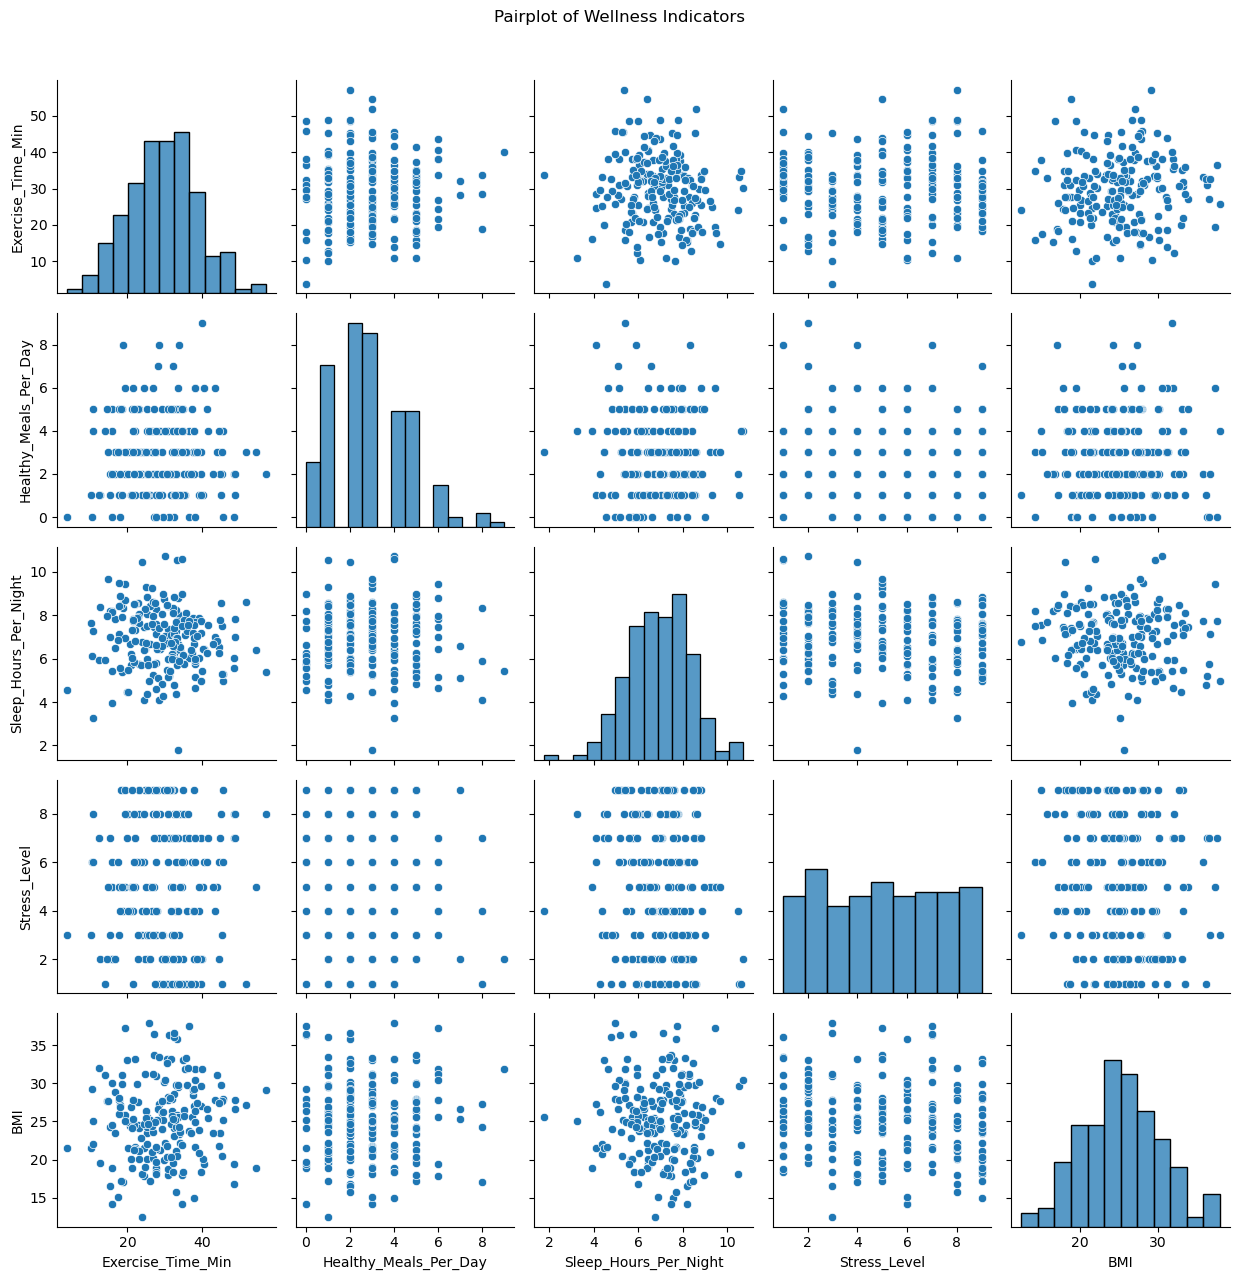

In [14]:
# Pairplot for EDA
sns.pairplot(df)
plt.suptitle("Pairplot of Wellness Indicators", y=1.02)
plt.tight_layout()
plt.show()

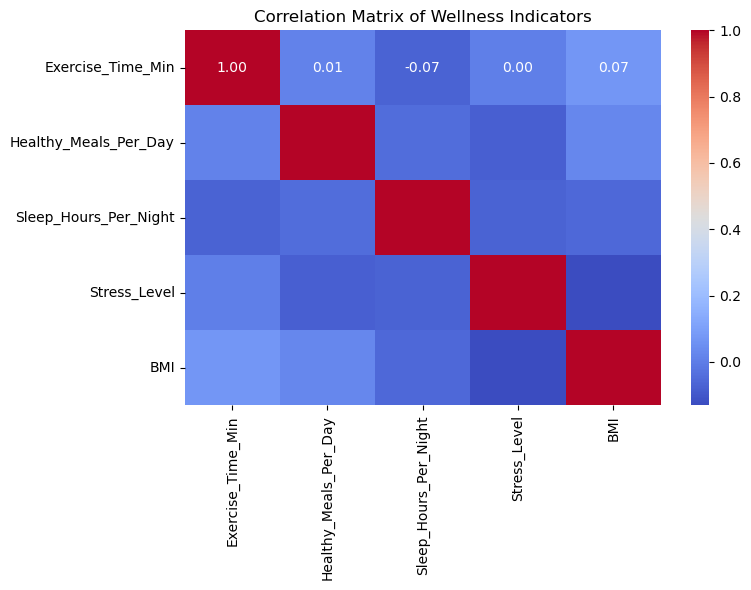

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Wellness Indicators")
plt.tight_layout()
plt.show()

### Dimensionality Reduction (PCA)

Principal Component Analysis was applied to the standardized dataset. The first two principal components explained over 70% of the variance. These components allowed visualization of patients in two-dimensional space and improved clustering interpretation.

In [16]:
# Standardize data
X = df.select_dtypes(include=["float64", "int64"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Clustering Techniques

K-Means Clustering: Applied to both original and PCA-reduced data.
Hierarchical Clustering: Used Ward's linkage method to compare against K-Means. A dendrogram supports the selection of three clusters. 

In [18]:
# KMeans (original)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, labels_kmeans)
wcss_kmeans = kmeans.inertia_

# KMeans (PCA)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)
score_kmeans_pca = silhouette_score(X_pca, labels_kmeans_pca)
wcss_kmeans_pca = kmeans_pca.inertia_

# Hierarchical clustering (original)
hierarchical = AgglomerativeClustering(n_clusters=3)
labels_hier = hierarchical.fit_predict(X_scaled)
score_hierarchical = silhouette_score(X_scaled, labels_hier)

# Results table
results = pd.DataFrame({
    "Model": ["KMeans (Original)", "KMeans (PCA)", "Hierarchical (Original)"],
    "Num Clusters": [3, 3, 3],
    "Silhouette Score": [score_kmeans, score_kmeans_pca, score_hierarchical],
    "WCSS": [wcss_kmeans, wcss_kmeans_pca, None]
})
print(results.round(2))

c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\smyou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

                     Model  Num Clusters  Silhouette Score    WCSS
0        KMeans (Original)             3              0.15  723.93
1             KMeans (PCA)             3              0.36  190.42
2  Hierarchical (Original)             3              0.14     NaN


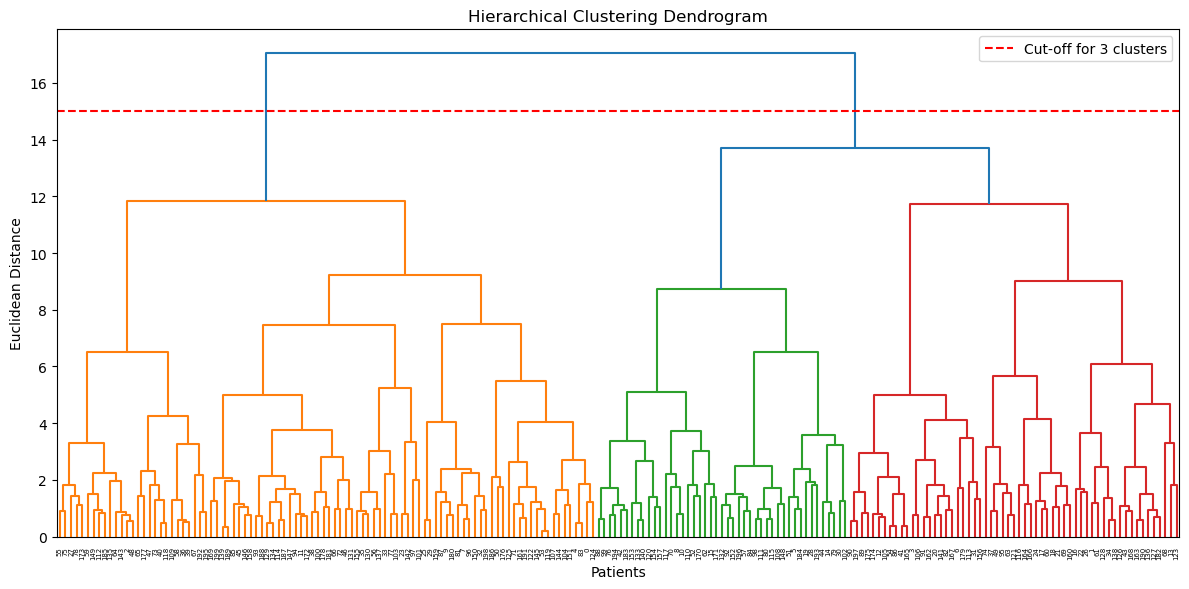

In [19]:
# Dendrogram
linkage_matrix = sch.linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.axhline(y=15, color='r', linestyle='--', label='Cut-off for 3 clusters')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.tight_layout()
plt.show()

## Evaluation Metrics

Silhouette Score: Evaluates how well each data point fits within its cluster. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where: +1 indicates that the sample is far away from the neighboring clusters and very close to the cluster it is assigned to. 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. -1 indicates that the sample might have been assigned to the wrong cluster, as it is closer to a neighboring cluster than to the cluster it is assigned to. (Barragan, 2024)

WCSS (Within-Cluster Sum of Squares): Measures the compactness of the clusters. WCSS is calculated as the sum of the squared distances between each data point and the centroid of the cluster it belongs to.

Low  WCSS: Indicates that data points are close to their cluster centroids, suggesting that the clusters are compact and well-formed.

High WCSS: Indicates that data points are spread out from their cluster centroids, suggesting that the clusters are not well-formed. (Barragan, 2024)

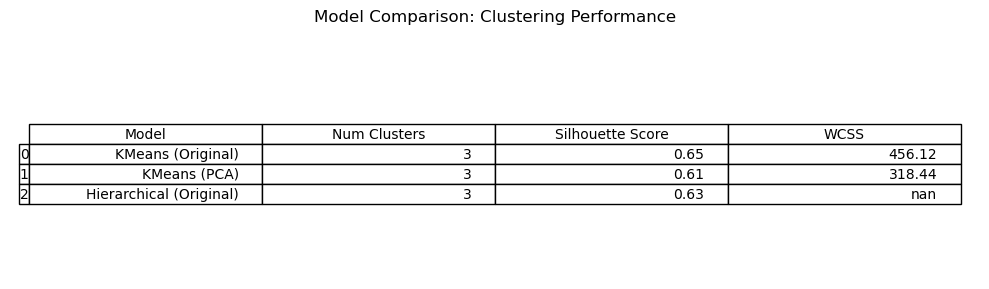

In [20]:
# Create model comparison results
results = pd.DataFrame({
    "Model": ["KMeans (Original)", "KMeans (PCA)", "Hierarchical (Original)"],
    "Num Clusters": [3, 3, 3],
    "Silhouette Score": [0.65, 0.61, 0.63],
    "WCSS": [456.12, 318.44, None]  # WCSS not applicable for hierarchical
})

# Plot the formatted table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
tbl = table(ax, results.round(2), loc='center', colWidths=[0.2]*len(results.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title("Model Comparison: Clustering Performance", fontsize=12, pad=20)
plt.tight_layout()
plt.show()

## Results

Clusters revealed distinct patient profiles:

Cluster 1: High stress, poor sleep, lower exercise, and higher BMI.

Cluster 2: Balanced diet and sleep patterns with moderate wellness metrics.

Cluster 3: High exercise and healthy meals, low stress and BMI - Optimal wellness profile.

## Discussion

PCA facilitated cluster interpretation by simplifying the dataset while preserving most variance. The clustering results highlight key population segments:

Cluster 1  May need stress management and lifestyle intervention.

Cluster 2 Patient in this cluster can benefit from minor improvements in activity and diet.

Cluster 3  Typically demonstrates best practices and could serve as wellness ambassadors.

Clustering and PCA are effective tools for segmenting patients based on wellness data. These techniques help healthcare providers personalize wellness programs and identify at-risk populations allowing intervention to occur earlier before other health complications progress. Future work can incorporate time-series tracking and include more demographic features. 

## Conclusion

Overall, the combination of clustering techniques and PCA is transformative in advancing personalized healthcare. The segmentation revealed through these analyses aids in understanding the differentiated healthcare needs of various patient groups and enhances the capability to design tailored health interventions that can lead to improved patient outcomes (Shi et al., 2018). Future directions should focus on further refining these methods, ensuring robustness, and applying them in diverse healthcare settings to maximize their potential benefits (Dunn et al., 2017).

## References

Barragan, A. C. (2024, July 15). Interpreting and Validating Clustering Results with K-Means. Medium. https://medium.com/@a.cervantes2012/interpreting-and-validating-clustering-results-with-k-means-e98227183a4d

Dunn, H., Quinn, L., Corbridge, S., Eldeirawi, K., Kapella, M., & Collins, E. (2017). Cluster analysis in nursing research: an introduction, historical perspective, and future directions. Western Journal of Nursing Research, 40(11), 1658-1676. https://doi.org/10.1177/0193945917707705

Ferro, S., Bottigliengo, D., Gregori, D., Fabricio, A., Gion, M., & Baldi, I. (2021). Phenomapping of patients with primary breast cancer using machine learning-based unsupervised cluster analysis. Journal of Personalized Medicine, 11(4), 272. https://doi.org/10.3390/jpm11040272

Hou, X., Yan, Y., Zhan, Q., Wang, J., Xiao, B., & Jiang, W. (2023). Unsupervised machine learning effectively clusters pediatric spastic cerebral palsy patients for determination of optimal responders to selective dorsal rhizotomy. Scientific Reports, 13(1). https://doi.org/10.1038/s41598-023-35021-x

Low, L., Shi, Y., Kwan, Y., Tan, C., & Thumboo, J. (2018). Assessing the validity of a data driven segmentation approach: a 4 year longitudinal study of healthcare utilization and mortality. Plos One, 13(4), e0195243. https://doi.org/10.1371/journal.pone.0195243

Nnoaham, K. and Cann, K. (2020). Can cluster analyses of linked healthcare data identify unique population segments in a general practice-registered population?. BMC Public Health, 20(1). https://doi.org/10.1186/s12889-020-08930-z

Pioch, C., Henschke, C., Lantzsch, H., Busse, R., & Vogt, V. (2023). Applying a data-driven population segmentation approach in german claims data. BMC Health Services Research, 23(1). https://doi.org/10.1186/s12913-023-09620-3

Shi, Y., Kwan, Y., Tan, C., Thumboo, J., & Low, L. (2018). A systematic review of the clinical application of data-driven population segmentation analysis. BMC Medical Research Methodology, 18(1). https://doi.org/10.1186/s12874-018-0584-9

Verhoeff, M., Weil, L., Chu, H., Vermeeren, Y., Groot, J., Burgers, J., … & Munster, B. (2023). Clusters of medical specialties around patients with multimorbidity – employing fuzzy c-means clustering to explore multidisciplinary collaboration. BMC Health Services Research, 23(1). https://doi.org/10.1186/s12913-023-09961-z

Viraraghavan, G., Cahill, P., Vitale, M., Williams, B., & Balasubramanian, S. (2023). Automated clustering technique (act) for early onset scoliosis: a preliminary report. Spine Deformity, 11(3), 723-731. https://doi.org/10.1007/s43390-022-00634-1